In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_rel




In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
alternate_color = False
simple_minerva_label = False


key ="otu_v_combat_Thomas"#"MINERVA_grid_t2d_calibrate"
subfile = ""
select_columns_bool = False
shortened_shortened = False
trans_vec = False
add_linmodel_type = False




if "calibrate" in key:
    numPc = [0,1,2,3,4,5,6,7,8,9]

    if "t2d" in key:
        
        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k7" for i in range(0,len(numPc))]
        limit_spec =(0.4,0.9)
        
    elif "gibbons" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Gibbons et al.)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,1.05)
        
    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["Thomas_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,0.85)
        
    elif "tom_" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc)+1)]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu" for i in range(0,(len(numPc)+1))]
        limit_spec =(0.5,0.9)
    elif "hispanic" in key:
        phen = ["antibiotic"  for i in range(len(numPc))]
        phen_pretty = "Antibiotic history (HCHS/SOL)"
        folder_names = ["Hispanic_k7" for i in range(0,len(numPc))]
        limit_spec =(0.5,0.81)   
        
    elif "agp_abx" in key:
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "abx"
        folder_names = ["AGP_max_k7" for i in range(0,len(numPc))]
        limit_spec =(0.57,0.68)
    
    elif "agp_bmi" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "body mass index"
        folder_names = ["AGP_max_k5" for i in range(0,len(numPc))]
        limit_spec =(-0.12,0.35)
    
        
        
    if any(x in key for x in ["t2d","gibbons","thomas","hispanic","agp_abx","tom"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
     
    select_columns_bool = True
    if simple_minerva_label:
        select_labels = numPc #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
   
    else:
        select_labels = numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    file_names =['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
    
    pair_test_all = False
    shortened=True
    not_rotate=True
    trans_vec = False
    trans = "clr_scale"
    
    if "tom_" in key:
        select_labels = ["raw"] + numPc#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
        file_names =["raw_grid"] + ['MINERVA_grid_PC' + str(numPc[i]) for i in range(0,len(numPc))]
        trans_vec = True
        trans = ["none"] + ["clr_scale" for i in range(0,len(numPc))]
        
    
elif "otu_v_kmer" in key:
    
    if "CRC" in key:
        numPc = [0,0,0]
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_otu","CRC_k6","CRC_k7"]
        limit_spec =(0.53,0.9)
        select_labels = ["OTU","k=6","k=7"]
        
    if "AGP" in key:
        numPc = [0,0,0]
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "antibiotic history (AGP, McDonald et al.)"
        folder_names = ["AGP_complete_otu","AGP_max_k5","AGP_max_k6"]
        limit_spec =(0.5,0.7)
        select_labels = ["OTU","k=5","k=6"]
    if "Thomas" in key:
        numPc = [0,0,0,0,0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","Thomas_k6","Thomas_k7","CRC_thomas_otu","Thomas_k6","Thomas_k7"]
        limit_spec =(0.5,1.02)
        select_labels = ["OTU","k=6","k=7","MINERVA \n OTU","MINERVA \n  k=6","MINERVA \n k=7"]
        
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    phen_type = "class"
    select_columns_bool = True
    
    #file_names =['raw_grid' for i in range(0,len(numPc))]
    file_names =['raw_grid' ,'raw_grid' ,'raw_grid' ,'MINERVA_grid' ,'MINERVA_grid' ,'MINERVA_grid' ]
    pair_test_all = True
    shortened=True
    not_rotate=True
    trans_vec = True
    #trans = ['none' for i in range(0,len(numPc))]
    trans = ['none','none','none','clr_scale','clr_scale','clr_scale' ]
    
elif "otu_v_combat" in key:
    
    if "Thomas" in key:
        numPc = [0,0]
        phen = ["bin_crc_normal"   for i in range(len(numPc))]
        phen_pretty ="colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu"]#,"CRC_thomas_otu"]
        limit_spec =(0.62,1)
        select_labels = ["OTU",'ComBat \n OTU']#,"MINERVA \n OTU",]
        
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    phen_type = "class"
    select_columns_bool = True
    
    #file_names =['raw_grid' for i in range(0,len(numPc))]
    file_names =['raw_grid' ,'ComBatlogscale_grid' ]#,'MINERVA_grid'  ]
    pair_test_all = True
    shortened=True
    not_rotate=True
    trans_vec = True
    #trans = ['none' for i in range(0,len(numPc))]
    trans = ['none','logscale']#,'clr_scale' ]
        
else:
    numPc = [0,0,0,0,0,0] 

    if "t2d" in key:
        
        phen = ["bin_t2d"  for i in range(len(numPc))]
        phen_pretty = "Type II diabetes status"
        folder_names = ["T2D_k6","T2D_k6","T2D_k6","T2D_k6","T2D_k7","T2D_k7"]
        limit_spec =(0.4,1)
        
    elif "gibbons" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Gibbons et al.)"
        folder_names = ["CRC_k7" for i in range(0,len(numPc))]
        limit_spec =(0.52,1.02)

        
    elif "thomas" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
        limit_spec =(0.53,0.85)
        
    elif "thoma_v_otu" in key:
        numPc = [0,0,0,0,0,0,0,0] 
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k6","Thomas_k6","Thomas_k7","Thomas_k7"]
        limit_spec =(0.5,1)
    elif "tom_" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        #folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7","Thomas_k7"]
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","Thomas_k7"]
        limit_spec =(0.3,1)
 
    elif "tomLODO" in key:
        phen = ["bin_crc_normal"  for i in range(len(numPc))]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","Thomas_k7","Thomas_k6","Thomas_k7","Thomas_k7"]
        limit_spec =(0.3,1)
    elif "tomDC" in key:
        phen = ["bin_crc_normal","bin_crc_normal","bin_crc_normal","bin_crc_adenomaORnormal","bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]
        phen_pretty = "colorectal cancer status (Thomas et al.)"
        folder_names = ["CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu","CRC_thomas_otu"]
        limit_spec =(0.3,1)
    
    elif "hispanic" in key:
        phen = ["antibiotic"  for i in range(len(numPc))]
        phen_pretty = "Antibiotic history (HCHS/SOL)"
        folder_names = ["Hispanic_k6","Hispanic_k6","Hispanic_k6","Hispanic_k6","Hispanic_k7","Hispanic_k7"]
        limit_spec =(0.5,0.9)
       
       
    
    
    elif "agp_bmi" in key:
        phen = ["bmi_corrected"  for i in range(len(numPc))]
        phen_pretty = "body mass index (McDonald et al.)"
        folder_names = ["AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5","AGP_max_k5"]
        limit_spec =(0,0.30)
    elif "agp_abx" in key:
        phen = ["bin_antibiotic_last_year"  for i in range(len(numPc))]
        phen_pretty = "antibiotic history (McDonald et al.)"
        folder_names = ["AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6","AGP_max_k6"]
        limit_spec =(0.585,0.68)
        
    if any(x in key for x in ["t2d","gibbons","thoma","hispanic","tom","agp_abx"]):
        metric_word = "auc_all"
        chosen_classifier = "Random Forest"
        title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
        phen_type = "class"
    elif "bmi" in key:
        metric_word = "pearson"
        chosen_classifier = ""
        title = 'Pearson for prediction of ' + phen_pretty #' #AUC for prediction of antibiotic history' #
        phen_type = "pred"
     
    select_columns_bool = True
    file_names = ['raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA0_grid",'MINERVA_grid'] 
    
    pair_test_all = False
    shortened=True
    not_rotate=False
    trans_vec = True
    trans = ["none","none","none","none","clr_scale","clr_scale"]
    
    
    if simple_minerva_label:
        select_labels = ["OTU_Raw","OTU_MINERVA","Raw","ComBat","limma","BMC","MINERVA0","MINERVA"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
        if "_v_" in key:
            file_names = ['raw_grid','MINERVA_grid','raw_grid','ComBat_grid','limma_grid','bmc_grid',"MINERVA0_grid",'MINERVA_grid'] 

            select_labels = ["OTU_Raw","OTU_MINERVA","Raw","ComBat","limma","BMC","MINERVA0","MINERVA"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["none","clr_scale","none","none","none","none","clr_scale","clr_scale"]
        if "tomLODO" in key:
            file_names = ['rawLODO_grid','pc_lodo_grid','rawLODO_grid','pc_lodo_grid',"rawLODO4_grid",'MINERVALODO_grid'] 

            select_labels = ["OTU_Raw (LODO)","OTU_PC (LODO)","Kmer7_raw (LODO)","Kmer6_PC (LODO)","","MINERVA (LODO)"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["none","clr_scale","none","clr_scale","clr_scale","clr_scale"]
        if "tomDC" in key:
            file_names = ['rawfilter_TRUE','DomainCorrectfilter_TRUE','minerva_first4filter_TRUE','rawfilter_TRUE','DomainCorrectfilter_TRUE','minerva_first4filter_TRUE'] 

            select_labels = ["OTU_Raw ","OTU_DC_Normal","MINERVA_Normal","OTU_Raw_Adenoma","OTU_DC_AdenomaNormal","MINERVA_Adenoma"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["clr_scale","clr_scale","clr_scale","clr_scale","clr_scale","clr_scale"]
            
        if "tom_" in key:
            file_names = ['rawVAL_grid','ComBatlogscaleVAL_grid','ComBatlogscaleVAL_grid',
                          'MINERVA_grid_PC2','MINERVA_VAL_grid','ComBatlogscaleVAL_grid'] 

            select_labels = ["OTU Raw","OTU ComBat (logscale)","OTU MINERVA1 (clrscale)",
                            "OTU MINERVA2 (clrscale)",
                             "OTU MINERVA (clrscale)",
                            "7-mer ComBat (logscale)"] #"Refactor (n. PCs =9)","SmartSVA (n. PCs =3)",
            trans = ["none","logscale","clr_scale","clr_scale","clr_scale","logscale"]
            
     
            

    else:
        select_labels = ["Raw","ComBat","limma","BMC","MINERVA0","MINERVA"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (n. PCs =5)","MINERVA (n. PCs =5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    
    
lin_model = "reg"
if not trans_vec:
    trans = ["clr_scale" for i in range(len(file_names))]
data_type = "kmer"

file_names = [file_names[f] + "_trans_" + trans[f] for f in range(len(file_names))]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 

 

In [4]:
df_metric = pd.DataFrame()

In [5]:
phen

['bin_crc_normal', 'bin_crc_normal']

In [6]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        if add_linmodel_type:
            
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_lin_model_" + lin_model +"_pearson_and_mse.pkl"
        
        else:
            # "_lin_model_" + lin_model +
            filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        
        filename_temp = data_folder + folder_names[f] + "/" +subfile + data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f] + phen[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            if "agp_abx" in key:
                
                df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word][0:13])
            else:
                df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_thomas_otu/kmer_BatchCorrected_bin_crc_normal_raw_grid_trans_none_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_thomas_otu/kmer_BatchCorrected_bin_crc_normal_ComBatlogscale_grid_trans_logscale_classification_auc.pkl


In [7]:
import numpy as np
import scipy
#delta = np.array(df_metric.iloc[:,4]-df_metric.iloc[:,0])
#print(np.mean(delta))
#print(scipy.stats.sem(delta))


In [8]:
df_metric

,CRC_thomas_oturaw_grid_trans_nonebin_crc_normal,CRC_thomas_otuComBatlogscale_grid_trans_logscalebin_crc_normal
0,0.782473,0.766243
1,0.788956,0.752385
2,0.793779,0.791383
3,0.849078,0.776190
4,0.824194,0.763594
5,0.774871,0.791458
6,0.793986,0.754771
7,0.808641,0.776871
8,0.788710,0.771202
9,0.870161,0.739862


In [9]:
df_metric.sum(axis=1)
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

0     1.548715
1     1.541341
2     1.585162
3     1.625269
4     1.587788
5     1.566330
6     1.548757
7     1.585511
8     1.559911
9     1.610023
10    1.624568
11    1.540463
12    1.510065
13    1.489026
14    1.557834
15    1.530082
16    1.577097
17    1.548899
18    1.541564
19    1.626498
20    1.565598
21    1.531721
22    1.607794
23    1.490921
24    1.618433
25    1.657623
26    1.495114
27    1.475814
28    1.591423
29    1.628341
30    1.514240
31    1.597037
32    1.576033
33    1.609820
34    1.607604
35    1.561366
36    1.600270
37    1.554049
38    1.534233
39    1.628341
40    1.554896
41    1.586851
42    1.569512
43    1.593797
44    1.472811
45    1.635485
46    1.657136
47    1.541848
48    1.516422
49    1.655991
dtype: float64

In [10]:
file_names

['raw_grid_trans_none', 'ComBatlogscale_grid_trans_logscale']

In [11]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

meh


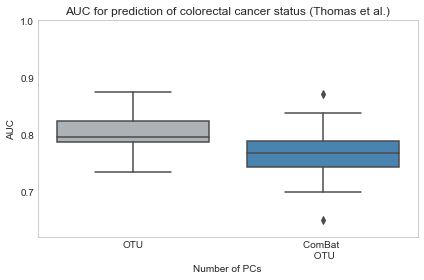

In [12]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only




# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
sns.set_style("whitegrid")
if select_columns_bool:
    
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        palette = sns.color_palette("Blues", df_metric.shape[1])
        plot_color = ["#ABB2B9"] + palette.as_hex()[1:]
        
        
        
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        
        
        current_palette = sns.color_palette()
        #sns.palplot(current_palette)
        #palette = sns.cubehelix_palette(df_metric.shape[1])
        if not alternate_color:
            #palette = sns.color_palette("Reds", df_metric.shape[1]-1)
            #plot_color = palette.as_hex()[::-1] + ["#0093FF"]#["#01d3e8"]
            
            #palette = sns.color_palette("Reds", 2)
            #reds_color = palette.as_hex()[1:2]
            
            #palette = sns.color_palette("Oranges", df_metric.shape[1]-2)
            #oranges_color = palette.as_hex()
            
            #plot_color = reds_color + oranges_color +["#0093FF"]
            
            #plot_color['#808B96','#F2F4F4',]
            plot_color =['#e32f27','#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
            
            if "_v_" in key:
                plot_color =['#e32f27',"#72C1FC",'#e32f27','#FF9300','#FFE800','#fdd0a2',"#72C1FC","#0093FF"]
                
        else:
            palette1 = sns.color_palette("Reds", 2) [::-1] 
            palette2 = sns.color_palette("Blues", 2)
            plot_color = palette1.as_hex() + palette2.as_hex()
            
        g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
g.set(ylim=limit_spec)

g.set_title(title)

asterisk = ["ns","*","**","***","****",""]

#g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
  
# box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
#                                       (df_metric.columns[0], df_metric.columns[2]),
#                                       (df_metric.columns[0], df_metric.columns[3]),
#                                       (df_metric.columns[0], df_metric.columns[4])]
# for a,b in box_pairs:
#     print(a,b)
#     t_stat = scipy.stats.ttest_rel(df_metric[a],df_metric[b], axis=0, nan_policy='propagate')
#     print(t_stat.pvalue)
#     if t_stat.pvalue < 0.05:
#         ax.text(x=1, y=1, s=asterisk[0], va='center') 

if not_rotate:
    
    ref_col = np.tile(df_metric.iloc[:,0], (df_metric.shape[1], 1))#[df_metric.iloc[:,0]]
    tick_vec = g.get_xticks()[1:]
else:
    
    ref_col = np.tile(df_metric.iloc[:,5], (5, 1))#[df_metric.iloc[:,4]]
    tick_vec = g.get_xticks()[:-1]
    
    if "_v_" in key:
        ref_col = np.tile(df_metric.iloc[:,7], (7, 1))#[df_metric.iloc[:,4]]
        tick_vec = g.get_xticks()[:-1]
        
    
    
    #ref_col = np.tile(df_metric.iloc[:,4], (4, 1))
    #ref_col = np.vstack([ref_col, df_metric.iloc[:,0]])
    #tick_vec = g.get_xticks()
    


vertical_offset = 0.05
for xtick_ind in range(len(tick_vec)):
    
    xtick = tick_vec[xtick_ind]
    
    compare_col = df_metric.iloc[:,xtick]
    median = np.max(compare_col)
    
    
    t_res = ttest_rel(ref_col[xtick_ind], compare_col,nan_policy ='omit')
    p = t_res.pvalue

    if not_rotate and np.nanmean(ref_col[xtick_ind]) > np.nanmean(compare_col):
        print("meh")
        asterisk_index = 5
    elif not not_rotate and np.nanmean(ref_col[xtick_ind]) < np.nanmean(compare_col):
        print("meh")
        asterisk_index = 5
    elif p > 5.00e-02 and p <= 1.00e+00:
        asterisk_index = 0
    elif 1.00e-02 < p  and p <= 5.00e-02:
        asterisk_index = 1
    elif 1.00e-03 < p and p <= 1.00e-02:
        asterisk_index = 2
    elif 1.00e-04 < p <= 1.00e-03:
        asterisk_index = 3
    elif p <= 1.00e-04:
        asterisk_index = 4
    else:
        asterisk_index = 5
        
        
        
        
    if not_rotate:
        g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color="#808B96",weight='semibold')
    else:
        
        g.text(xtick,median + vertical_offset,asterisk[asterisk_index], 
            horizontalalignment='center',size='large',color="#0093FF",weight='semibold')
    


g.yaxis.grid(False)
if metric_word== "pearson":
    g.set(xlabel="Method", ylabel = "Pearson Correlation")
else:
    if not_rotate:
        if "otu_v_kmer" in key:
            g.set(xlabel="Data type", ylabel = "AUC")
        else:
            g.set(xlabel="Number of PCs", ylabel = "AUC")
    else:
        g.set(xlabel="Method", ylabel = "AUC")



#
plt.rc('figure', titlesize=18)# controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=10) 

plt.tight_layout()
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')
plt.show()




In [13]:
#np.repeat(ref_col, 4)

test = np.tile(ref_col, (4, 1))
#np.append(test,df_metric.iloc[:,4],axis=1)





In [14]:
df_metric.mean(axis=0)

CRC_thomas_oturaw_grid_trans_nonebin_crc_normal                   0.803582
CRC_thomas_otuComBatlogscale_grid_trans_logscalebin_crc_normal    0.767127
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CRC_thomas_oturaw_grid_trans_nonebin_crc_normal v.s. CRC_thomas_otuComBatlogscale_grid_trans_logscalebin_crc_normal: t-test independent samples with Bonferroni correction, P_val=1.451e-06 stat=5.132e+00


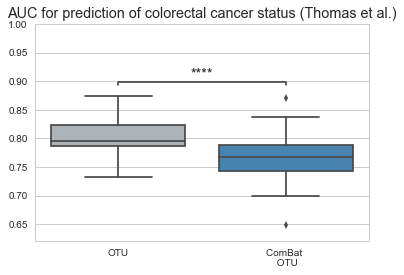

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
sns.set_context("paper", font_scale=1.5) 
sns.set_style("whitegrid")
if pair_test_all:
    if shortened:
        if shortened_shortened:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[2], df_metric.columns[3])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)
        else:
            if key == 'Gibbons':
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                      (df_metric.columns[0], df_metric.columns[2]),
                                      (df_metric.columns[0], df_metric.columns[3]),
                                      (df_metric.columns[0], df_metric.columns[4]),
                                       (df_metric.columns[1], df_metric.columns[4])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)
            else:
                add_stat_annotation(ax, data=df_metric,
                            box_pairs=[(df_metric.columns[0], df_metric.columns[1])],
                            test='t-test_ind', text_format='star', loc='outside', verbose=2)

    else:
        add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                  (df_metric.columns[0], df_metric.columns[5]),
                                  (df_metric.columns[0], df_metric.columns[6])],
                        test='t-test_ind', text_format='star', loc='outside', verbose=2)

else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[2], df_metric.columns[3]),
                              (df_metric.columns[0], df_metric.columns[1])],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
if not_rotate:
    ax.set_xticklabels(labels = select_labels)
else:
    ax.set_xticklabels(rotation=90,labels = select_labels)
ax.set(ylim=limit_spec)
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans[0] + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [ ]:
shortened

In [ ]:
np.mean(np.array(df_metric.sum(axis=0)))

In [ ]:
test = df_metric.sum(axis=0)
        
    
    
    

In [ ]:
test

In [ ]:
sum(np.isnan(df_metric.sum(axis=0)))